In [2]:
import numpy as np

import pandas as pd

import plotly.express as px

import re

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
path = r"https://raw.githubusercontent.com/shihab-ahmed19/Titanic/main/dataset/"

def bring_data(file):
  return pd.read_csv(path+file)

In [4]:
train = bring_data("train.csv")

test = bring_data("test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Structure Investigation

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [10]:
train.describe(exclude="number")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Titles

Text(0.5, 1.0, 'Counts of Different Titles')

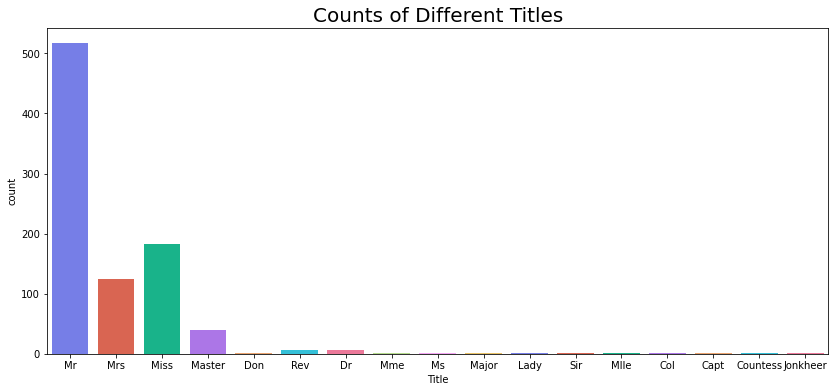

In [11]:
train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

plt.figure(figsize=(14,6))

sns.countplot(data=train, x='Title', palette=px.colors.qualitative.Plotly)
plt.title('Counts of Different Titles', fontsize=20)

#train['Title'].value_counts().plot.bar(title='Counts of Different Titles', color=px.colors.qualitative.Plotly)

In [12]:
#Doing the same to test data
test['Title'] = test['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [13]:
title_dict = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Countess":   "Royalty",
    "Dona":       "Royalty",
    "Lady" :      "Royalty",
    "Mme":        "Mrs",
    "Ms":         "Mrs",
    "Mrs" :       "Mrs",
    "Mlle":       "Miss",
    "Miss" :      "Miss",
    "Mr" :        "Mr",
    "Master" :    "Master"
    }

train['Title'] = train.Title.map(title_dict)
test['Title'] = test.Title.map(title_dict)

In [14]:
train.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

###Survival wrt Titles

Chances of Survival WRT Titles:
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Title Grouped Survival Count')

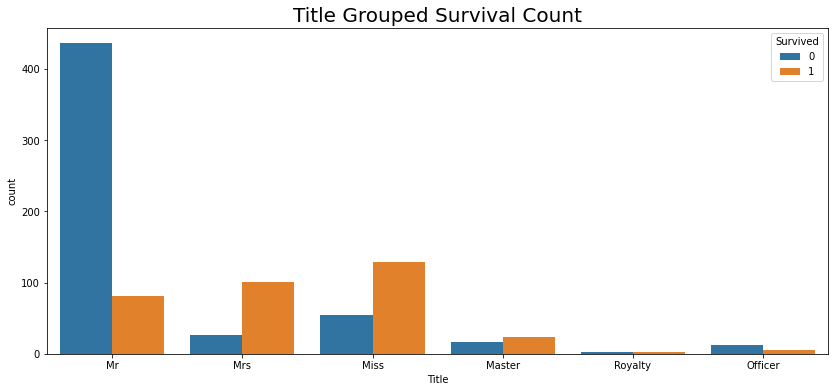

In [15]:
print('Chances of Survival WRT Titles:')
print(train.groupby(['Title'])['Survived'].mean())

plt.figure(figsize=(14,6))

sns.countplot(data=train, x='Title', hue='Survived')

plt.title('Title Grouped Survival Count', fontsize=20)

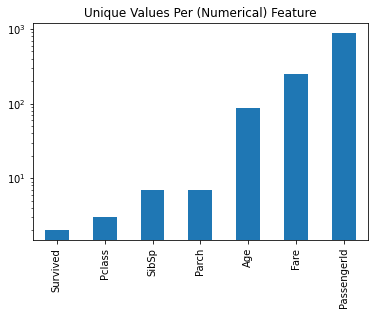

In [16]:
# For each numerical feature compute number of unique entries
unique_values = train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, title="Unique Values Per (Numerical) Feature")

In [17]:
# binary(2 unique), ordinal(2-10 unique), continuous(>10 unique) features

#Quality Investigation

##Duplicates

In [18]:
# Duplicates
n_duplicates = train.duplicated(subset='Name').sum()
print(n_duplicates)

0


In [19]:
# If there were duplicates:
# train = train.drop_duplicates(subset='Name')

##Missing Values

###Per Sample

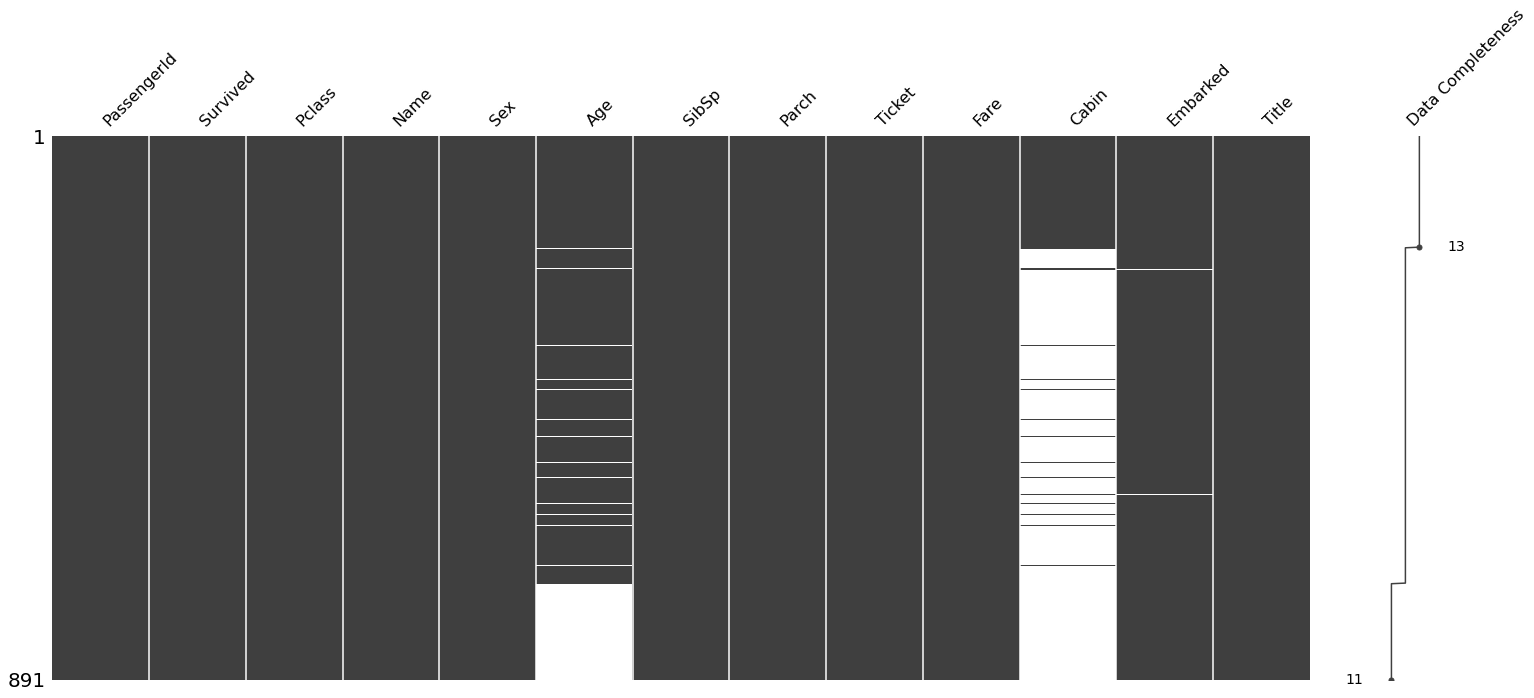

In [20]:
import missingno as msno

msno.matrix(train, labels=True, sort='descending')

On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right. A closeup can be seen above. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left.

For samples that have too many features missing, filling the missing values with some replacement values is probably not a good idea.

Therefore, it's better to drop such samples.(We select samples that have >30% missing data to be dropped). The threshold is inspired by the information from the ‘Data Completeness’ column on the right of this figure.

In [21]:
train = train.dropna(thresh=train.shape[1] * 0.70, axis=0).reset_index(drop=True)
train.shape

(891, 13)

###Per Feature

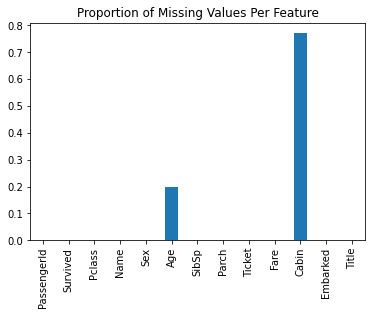

In [22]:
train.isna().mean().plot(
    kind='bar',
    title='Proportion of Missing Values Per Feature'
)

In [23]:
#dropping features that have more than 30% missing values
train = train.dropna(thresh=train.shape[0] * 0.7, axis=1)
train.shape

(891, 12)

In [24]:
#It is clear that the cabin feature has been dropped. Doing the same for test data
del test['Cabin']
test.shape

(418, 11)

The "Age" feature also has quite a few missing values. So we need to do something to fix it

In [25]:
# Creating 2 seperate dataframes wihout missing values
age_ok_surv = train[(train['Age'] > 0) & (train['Survived'] == 1)]
age_ok_died = train[(train['Age'] > 0) & (train['Survived'] == 0)]

In [26]:
import plotly.figure_factory as ff

# Group data together
hist_data = [age_ok_surv['Age'], age_ok_died['Age']]

group_labels = ['Survived', 'Died']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
fig.show()

In [27]:
# Grouping the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train.groupby(['Sex', 'Pclass', 'Title'])['Age']

print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [28]:
# train.groupby(['Sex','Pclass','Title']).Age.transform('median') ---- transforms the 'Age' feature of all entries into their corresponding medians

# train.loc[train.Age.isnull(), 'Age'] --- returns a series of the missing Age values with their previous index

train.loc[train.Age.isnull(), 'Age'] = train.groupby(['Sex','Pclass','Title']).Age.transform('median')

train["Age"].isnull().sum()

0

Let's see the change in distributions

In [29]:
fig = ff.create_distplot([train['Age']], ['Train Dataset'], bin_size=5)
fig.update_layout(title_text='Distribution of Age Variable')
fig.show()

In [30]:
# Creating distributions based on survival
surv = train[(train['Survived'] == 1)]
died = train[(train['Survived'] == 0)]

# Group data together
hist_data = [surv['Age'], died['Age']]

group_labels = ['Train DF_Survived', 'Train DF_Died']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
fig.update_layout(title_text='Distribution of Age Variable Based on Survival')
fig.show()

Now let's categorize the ages

In [31]:
#creating intervals at which to cut ages
intervals = (0, 5, 12, 18, 25, 35, 60, 120)

#setting names of categories
cats = ['Baby', 'Child', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

#cutting Age
train['Age_Cat'] = pd.cut(train.Age, intervals, labels=cats)

train['Age_Cat'].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_Cat, dtype: category
Categories (7, object): ['Baby' < 'Child' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

In [32]:
# Do the same for test dataset
test['Age_Cat'] = pd.cut(test.Age, intervals, labels=cats)

##Unwanted entries and recording errors

###Numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ba61f2f90>,
      dtype=object)

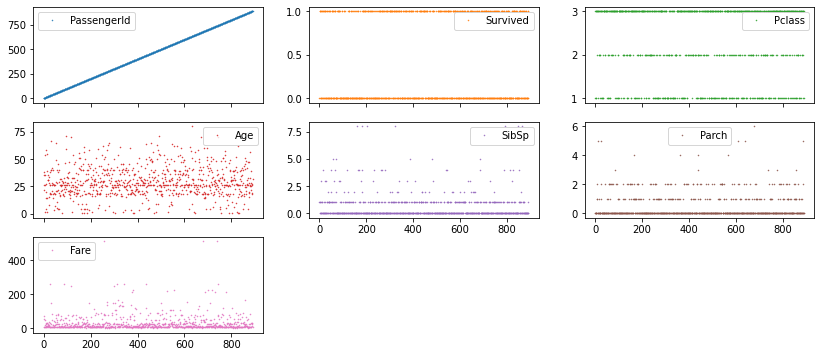

In [33]:
train.plot(lw=0, marker='.',    # Instead of lines, we tell the plot to use . as markers for each data point
            subplots=True,       # plot each feature in a separate subplot
            layout=(-1, 3),      # -1 means “as many as needed”, while the 3 means to use 3 columns per row.
            figsize=(14, 6), 
            markersize=1)

We don't detect the presence of any out of the ordinary value through the graphs 

#Content Investigation

##Feature Distribution

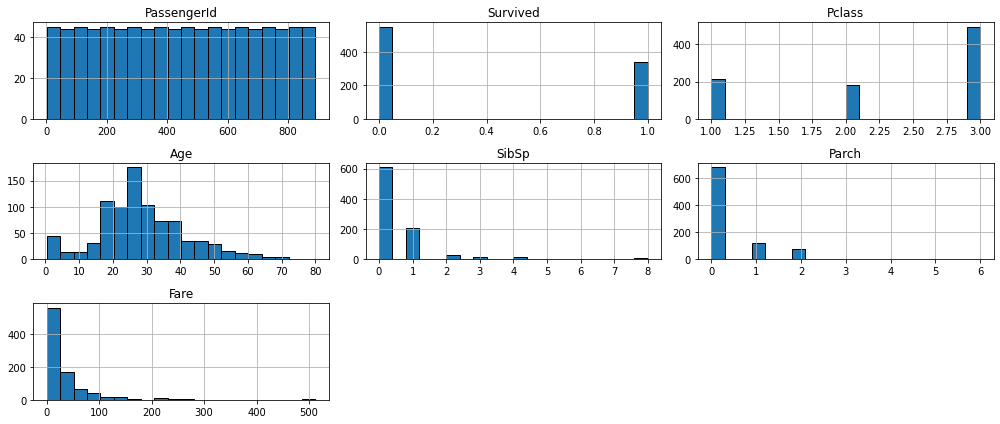

In [34]:
train.hist(bins=20, figsize=(14,6), layout=(-1, 3), edgecolor='black')
plt.tight_layout();

###Most Frequent Entries

In [35]:
most_frequent_entries = train.mode()

# Checks for each entry if it contains the most frequent entry
train_freq = train.eq(most_frequent_entries.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
train_freq = train_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(train_freq.head())

px.bar(train_freq[1:])   #plotting without passengerID

PassengerId    1.000000
Survived       0.001122
Pclass         0.001122
Name           0.001122
Sex            0.001122
dtype: float64

Because each and every passengerID appears only once, all are considered most frequently occurring.

Besides that, no feature has any particular value that repeats very frequently

##Feature Patterns

Survived    0   1
Age_Cat          
Baby       15  33
Child      16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



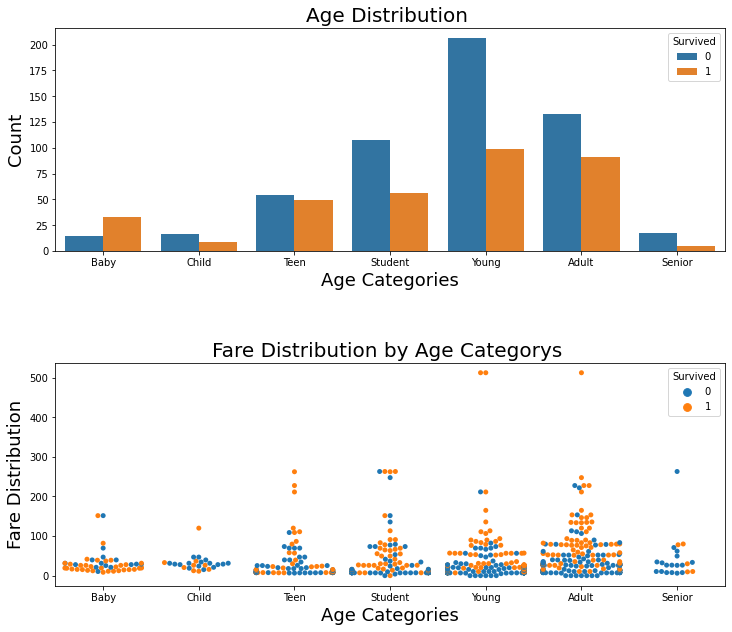

In [36]:
print(pd.crosstab(train.Age_Cat, train.Survived))

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.countplot(x="Age_Cat", hue="Survived", data=train)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x="Age_Cat", y="Fare", hue="Survived", data=train)
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [37]:
# Creates mask to identify numerical features with more or less than 20 unique features
cols_continuous = train.select_dtypes(include="number").nunique() >= 20
cols_continuous.drop('PassengerId', inplace=True)
cols_continuous

Survived    False
Pclass      False
Age          True
SibSp       False
Parch       False
Fare         True
dtype: bool

In [38]:
# Create a new dataframe which only contains the continuous features
train_cont = train[cols_continuous[cols_continuous].index]
print(train_cont.shape)
train_cont.head()

(891, 2)


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [39]:
# Visualizing the relationships between the continuous features
px.scatter_matrix(train_cont)

<Figure size 1440x720 with 0 Axes>

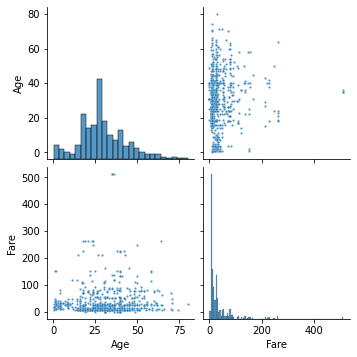

In [40]:
plt.figure(figsize=(20,10))
sns.pairplot(train_cont, plot_kws={"s": 5, "alpha": 0.8})
plt.show()

In [41]:
# Create a new dataframe which doesn't contain the numerical continuous features
train_disc = train[cols_continuous[~cols_continuous].index]
train_disc.shape

(891, 4)

####Stripplots

Stripplots are used to visualize the relationship between categorical variables with a continuous variable

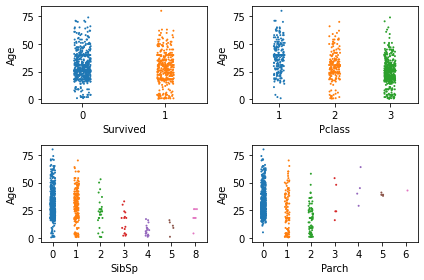

In [42]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=2, nrows=2)

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(train_disc.columns, axes.ravel()):
    sns.stripplot(data=train, x=col, y=train['Age'], ax=ax, palette="tab10", size=2, alpha=1)
plt.tight_layout();

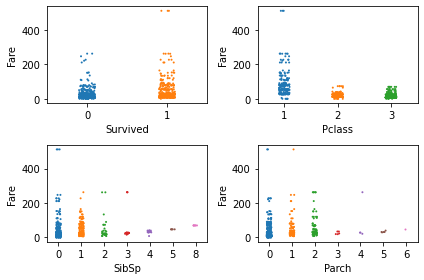

In [43]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=2, nrows=2)

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(train_disc.columns, axes.ravel()):
    sns.stripplot(data=train, x=col, y=train['Fare'], ax=ax, palette="tab10", size=2, alpha=1)
plt.tight_layout();

##Feature Relationships

In [44]:
cm = sns.light_palette("green", as_cmap=True)
pd.pivot_table(train[['Fare','Pclass', 'Age_Cat']], index=['Pclass'], columns=['Age_Cat'], aggfunc=['mean']).style.background_gradient(cmap = cm)

In [45]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition
hist_data = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']]
group_labels = ['Survived', 'Died']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
fig.update_layout(title_text='Fare Distribuition by Survived')
fig.show()

train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Figure size 864x360 with 0 Axes>

####Fare Categories

In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Age_Cat'],
      dtype='object')

Survived    0    1
Fare_Cat          
q1        175   51
q2        155   62
q3        112   99
q4         93  129


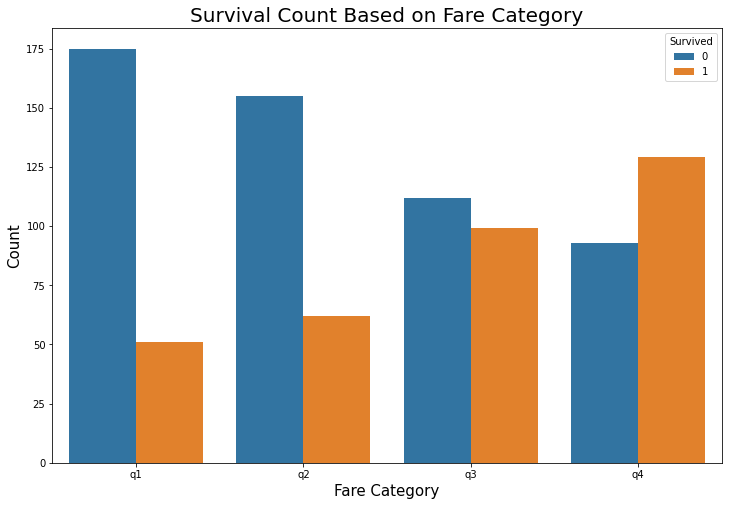

In [47]:
intervals = (0, 8, 15, 31, 600)

fare_labels = ['q1', 'q2', 'q3', 'q4']

train['Fare_Cat'] = pd.cut(train['Fare'], intervals, labels=fare_labels)

print(pd.crosstab(train.Fare_Cat, train.Survived))

plt.figure(figsize=(12, 8))

sns.countplot(x="Fare_Cat", hue="Survived", data=train)

plt.title('Survival Count Based on Fare Category', fontsize=20)
plt.xlabel("Fare Category",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [48]:
#Do the same for test dataset
test['Fare'] = test['Fare'].fillna(-0.5)

intervals = (-1, 0, 8, 15, 31, 600)

fare_labels = ['no_inf', 'q1', 'q2', 'q3', 'q4']

test['Fare_Cat'] = pd.cut(test['Fare'], intervals, labels=fare_labels)

###Dropping irrelevant features

In [49]:
train.drop(columns=['Fare', 'Age', 'Name', 'Ticket'], inplace=True)

test.drop(columns=['Fare', 'Age', 'Name', 'Ticket'], inplace=True)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Cat,Fare_Cat
0,1,0,3,male,1,0,S,Mr,Student,q1
1,2,1,1,female,1,0,C,Mrs,Adult,q4
2,3,1,3,female,0,0,S,Miss,Young,q1
3,4,1,1,female,1,0,S,Mrs,Young,q4
4,5,0,3,male,0,0,S,Mr,Young,q2


In [51]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Cat,Fare_Cat
0,892,3,male,0,0,Q,Mr,Young,q1
1,893,3,female,1,0,S,Mrs,Adult,q1
2,894,2,male,0,0,Q,Mr,Senior,q2
3,895,3,male,0,0,S,Mr,Young,q2
4,896,3,female,1,1,S,Mrs,Student,q2


Text(0.5, 1.0, 'Count of Survival')

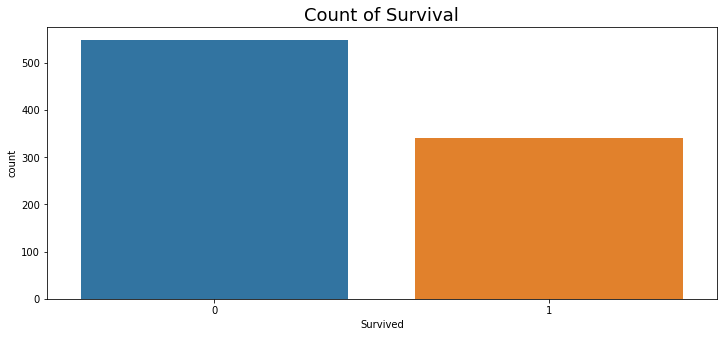

In [55]:
plt.figure(figsize=(12, 5))

sns.countplot(data=train, x='Survived')

plt.title('Count of Survival', fontsize=18)

Text(0.5, 1.0, 'Count of Survival by Sex')

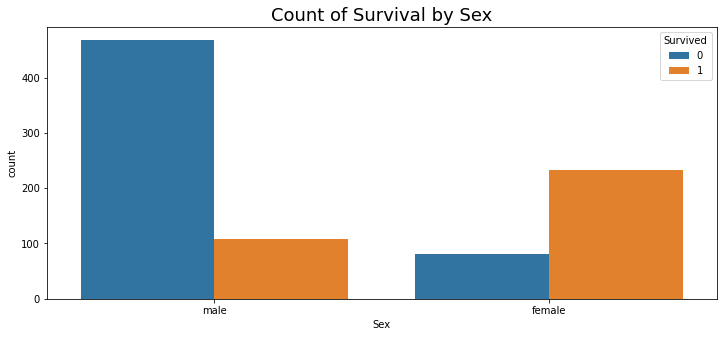

In [57]:
plt.figure(figsize=(12, 5))

sns.countplot(data=train, x='Sex', hue='Survived')

plt.title('Count of Survival by Sex', fontsize=18)

The odds of survival of men are much lower than that of women

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


Text(0.5, 1.0, 'Count of Embarked location Grouped by Pclass')

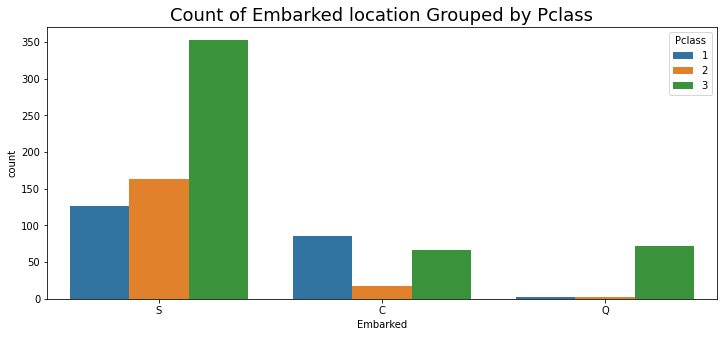

In [59]:
print(pd.crosstab(train.Pclass, train.Embarked))

# countplot of Embarked location grouped by Pclass
plt.figure(figsize=(12, 5))

sns.countplot(data=train, x='Embarked', hue='Pclass')

plt.title('Count of Embarked location Grouped by Pclass', fontsize=18)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Text(0.5, 1.0, 'Count of Survival in Various Embarked Locations')

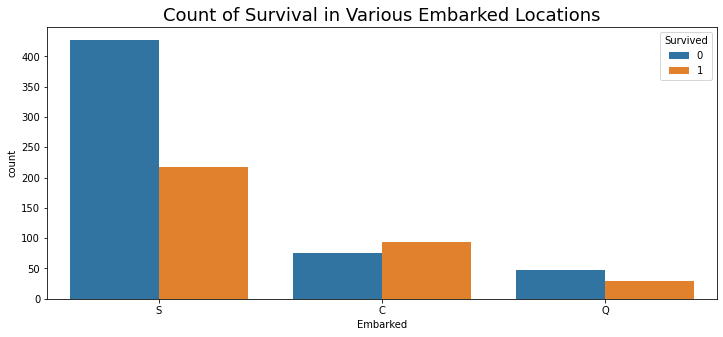

In [72]:
print(pd.crosstab(train.Survived, train.Embarked))

plt.figure(figsize=(12, 5))

sns.countplot(data=train, x='Embarked', hue='Survived')

plt.title('Count of Survival in Various Embarked Locations', fontsize=18)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5, 1.0, 'Count of Survival in Various Social Classes')

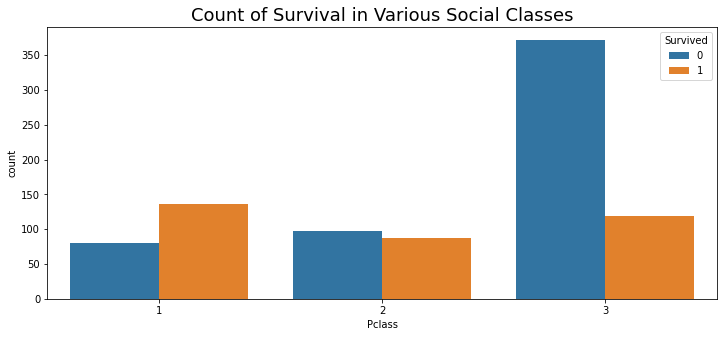

In [73]:
print(pd.crosstab(train.Survived, train.Pclass))

plt.figure(figsize=(12, 5))

sns.countplot(data=train, x='Pclass', hue='Survived')

plt.title('Count of Survival in Various Social Classes', fontsize=18)

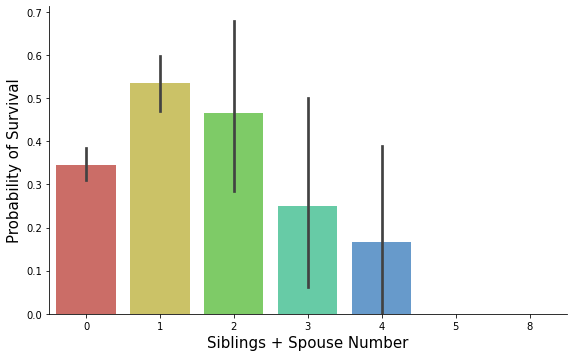

In [76]:
g = sns.catplot(x="SibSp", y="Survived", data=train,
                   kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels('Probability of Survival', fontsize=15)
g.set_xlabels('Siblings + Spouse Number', fontsize=15)
plt.show()

The vertical lines represent the confidence interval. 

For example, the group of 2 SibSp has a probability of 0.48 of survival. Say the confidence interval of the group is x%: means that if sampling is done over and over again, people with 2 SibSp will have a probability of 0.48 of surviving x% of the time.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



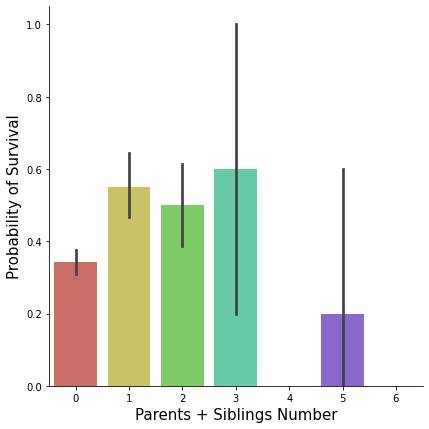

In [80]:
g = sns.catplot(data=train, x='Parch', y='Survived',
                kind='bar', size=6, palette='hls')
g.set_ylabels('Probability of Survival', fontsize=15)
g.set_xlabels('Parents + Siblings Number', fontsize=15)
plt.show()

In [82]:
#Creating a new column that shows family size
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

Survived       0    1
Family_size          
1            374  163
2             72   89
3             43   59
4              8   21
5             12    3
6             19    3
7              8    4
8              6    0
11             7    0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



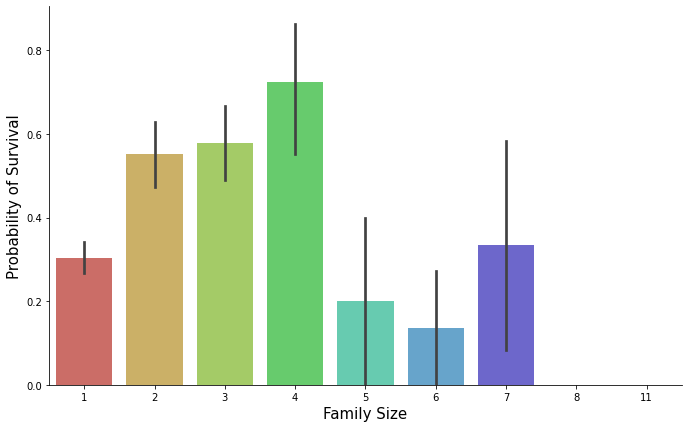

In [84]:
print(pd.crosstab(train.Family_size, train.Survived))

g = sns.catplot(data=train, x='Family_size', y='Survived',
                kind='bar', size=6, aspect=1.6, palette='hls')
g.set_ylabels('Probability of Survival', fontsize=15)
g.set_xlabels('Family Size', fontsize=15)
plt.show()

In [85]:
train.drop(columns=['SibSp', 'Parch'], inplace=True)
test.drop(columns=['SibSp', 'Parch'], inplace=True)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_Cat,Fare_Cat,Family_size
0,1,0,3,male,S,Mr,Student,q1,2
1,2,1,1,female,C,Mrs,Adult,q4,2
2,3,1,3,female,S,Miss,Young,q1,1
3,4,1,1,female,S,Mrs,Young,q4,2
4,5,0,3,male,S,Mr,Young,q2,1


In [88]:
train_corr = train.corr(method='pearson')

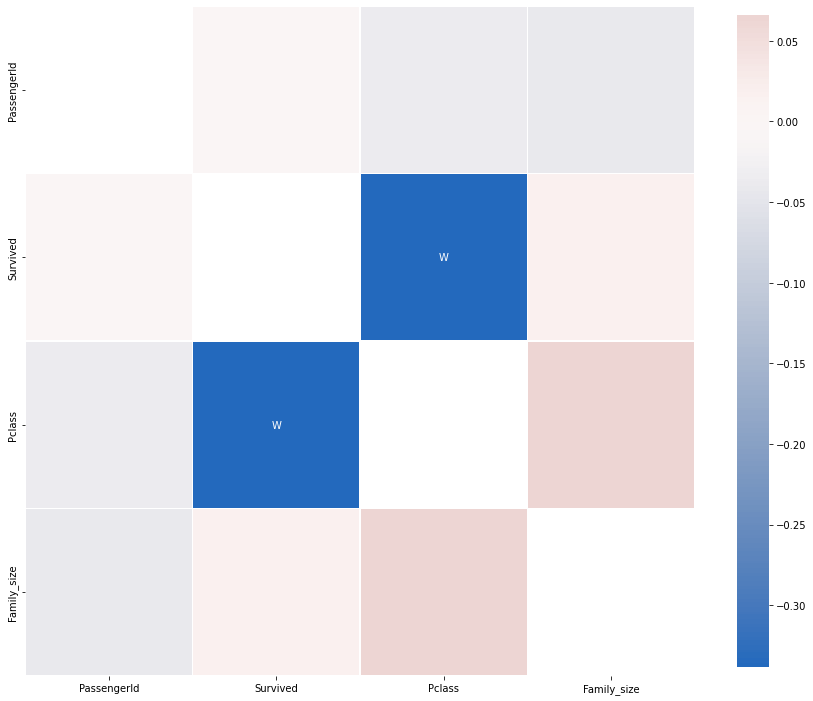

In [89]:
# Create labels for the correlation matrix
labels = np.where(np.abs(train_corr)>0.75, "S",
                  np.where(np.abs(train_corr)>0.5, "M",
                           np.where(np.abs(train_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(train_corr, mask=np.eye(len(train_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

#Preprocessing

In [90]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked', 'Title',
       'Age_Cat', 'Fare_Cat', 'Family_size'],
      dtype='object')

In [91]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Title', 'Age_Cat', 'Fare_Cat'],
                       prefix=['Sex', 'Emb', 'Prefix', 'Age', 'Fare'], drop_first=True)

test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Title', 'Age_Cat', 'Fare_Cat'],
                       prefix=['Sex', 'Emb', 'Prefix', 'Age', 'Fare'], drop_first=True)

In [92]:
# Converted all categorical variables into indicator variables
train.head()

,PassengerId,Survived,Pclass,Family_size,Sex_male,Emb_Q,Emb_S,Prefix_Miss,Prefix_Mr,Prefix_Mrs,...,Prefix_Royalty,Age_Child,Age_Teen,Age_Student,Age_Young,Age_Adult,Age_Senior,Fare_q2,Fare_q3,Fare_q4
0,1,0,3,2,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,1,2,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,3,1,3,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,2,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,5,0,3,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


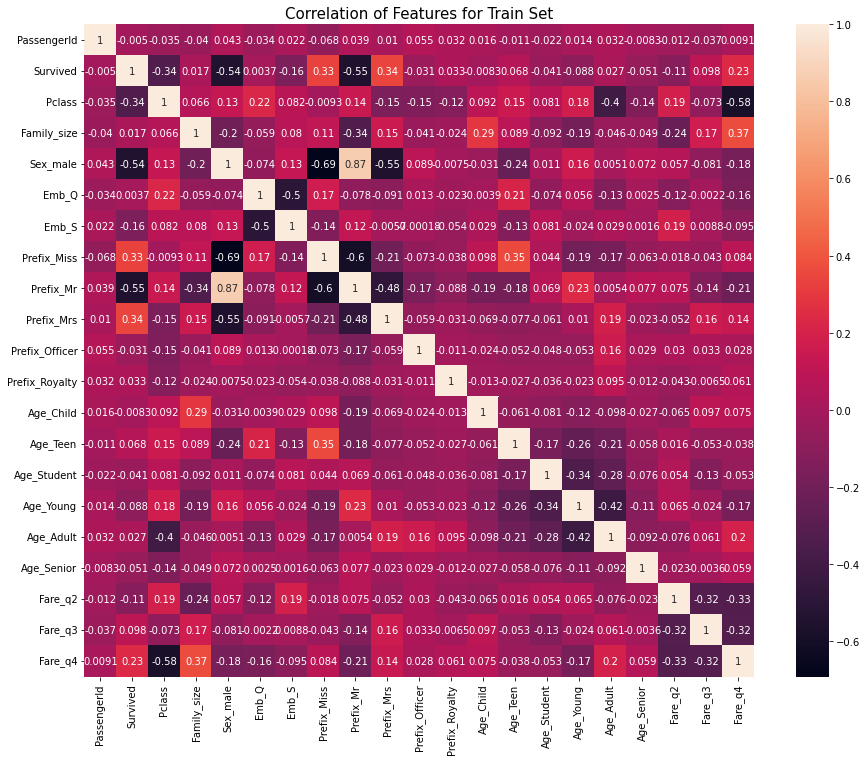

In [98]:
#Lets look the correlations in train dataset
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set', fontsize=15)

sns.heatmap(train.astype(float).corr(), vmax=1.0, annot=True)

plt.show()